In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Disable scientific notation for large numbers
pd.options.display.float_format = '{:.0f}'.format

# Setting display options for Pandas to show three decimal places for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [59]:
df = pd.read_csv('/content/drive/MyDrive/USvideos.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [61]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [62]:
df.shape

(40949, 16)

In [63]:
# check for duplicates
df.duplicated().sum()

48

In [64]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [65]:
df.duplicated().sum()

0

In [66]:
df.shape

(40901, 16)

In [67]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40901.000,40901.000,40901.000,40901.000,40901.000
mean,19.971,2360678.039,74271.734,3711.722,8448.567
std,7.569,7397718.728,228999.928,29046.241,37451.387
min,1.000,549.000,0.000,0.000,0.000
25%,17.000,241972.000,5416.000,202.000,613.000
50%,24.000,681064.000,18069.000,630.000,1855.000
75%,25.000,1821926.000,55338.000,1936.000,5752.000
max,43.000,225211923.000,5613827.000,1674420.000,1361580.000


In [68]:
# drop columns thumbnail_link and description
columns_to_drop = ['thumbnail_link','description']
df.drop(columns=columns_to_drop, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  comments_disabled       40901 non-null  bool  
 12  ratings_disabled        40901 non-null  bool  
 13  video_error_or_removed  40901 non-null  bool  
dtypes: bool(3), int64(5), object(6)
memory usage: 3.9+ MB


In [70]:
# Convert the `trending_date` Column to Datetime Format
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'])

In [71]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False


In [72]:
# Create new columns publish_month, publish_day and publish_hour from publish_time
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day
df['publish_hour'] = df['publish_time'].dt.hour

In [73]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_month,publish_day,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,11,13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,11,13,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,11,12,19
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,11,13,11
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,11,12,18


In [74]:
# Display unique category_id
df['category_id'].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43])

In [75]:
# Create new column category_name on basis of category_id values
df['category_name'] = np.nan
df.loc[df["category_id"] == 1, "category_name"] = "Film and Animation"
df.loc[df["category_id"] == 2, "category_name"] = "Autos and Vehicles"
df.loc[df["category_id"] == 10, "category_name"] = "Music"
df.loc[df["category_id"] == 15, "category_name"] = "Pets and Animals"
df.loc[df["category_id"] == 17, "category_name"] = "Sports"
df.loc[df["category_id"] == 19, "category_name"] = "Travel and Events"
df.loc[df["category_id"] == 20, "category_name"] = "Gaming"
df.loc[df["category_id"] == 22, "category_name"] = "People and Blogs"
df.loc[df["category_id"] == 23, "category_name"] = "Comedy"
df.loc[df["category_id"] == 24, "category_name"] = "Entertainment"
df.loc[df["category_id"] == 25, "category_name"] = "News and Politics"
df.loc[df["category_id"] == 26, "category_name"] = "How to and Style"
df.loc[df["category_id"] == 27, "category_name"] = "Education"
df.loc[df["category_id"] == 28, "category_name"] = "Science and Technology"
df.loc[df["category_id"] == 29, "category_name"] = "Non Profits and Activism"
df.loc[df["category_id"] == 43, "category_name"] = "Shows"

<ipython-input-75-cc086f797c7d>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Film and Animation' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df["category_id"] == 1, "category_name"] = "Film and Animation"


In [76]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_month,publish_day,publish_hour,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,11,13,17,People and Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,11,13,7,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,11,12,19,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,11,13,11,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,11,12,18,Entertainment


# Data Visualization

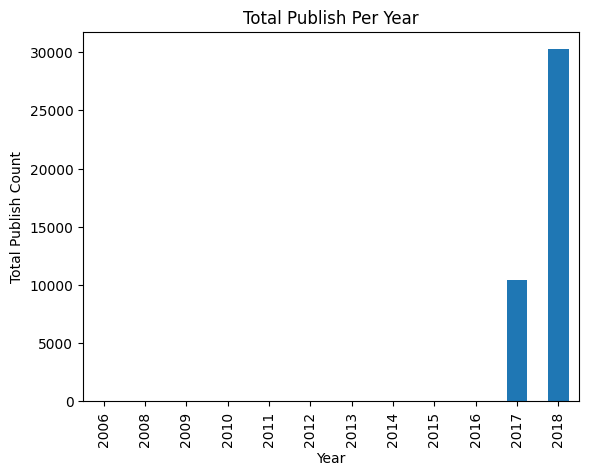

In [77]:
# Bar chart for Total Publish Per Year
df['year'] = df['publish_time'].dt.year
yearly_counts = df.groupby('year')['video_id'].count()
yearly_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Publish Count')
plt.title('Total Publish Per Year')
plt.show()

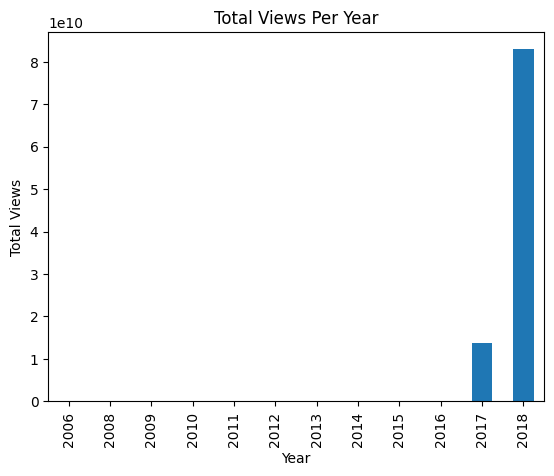

In [78]:
# Bar chart for Total Views Per Year
yearly_views = df.groupby('year')['views'].sum()
yearly_views.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.title('Total Views Per Year')
plt.show()

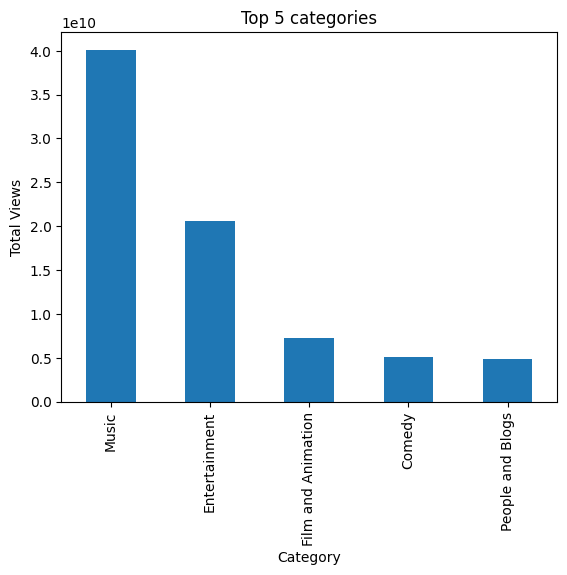

In [79]:
# Bar plot to visualize top 5 categories
category_views = df.groupby('category_name')['views'].sum().reset_index()
top_5_categories = df.groupby('category_name')['views'].sum().nlargest(5)
top_5_categories.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Views')
plt.title('Top 5 categories')
plt.show()

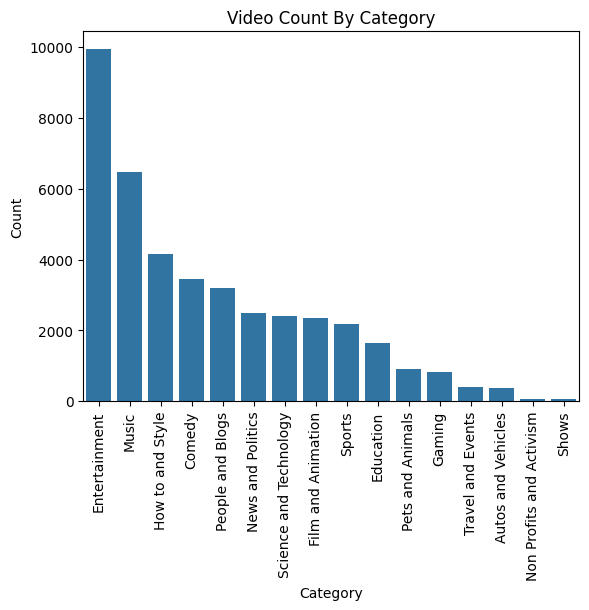

In [80]:
# Count plot for Video Count By Category
sb.countplot(data=df, x='category_name', order=df['category_name'].value_counts().index)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Video Count By Category')
plt.xticks(rotation=90)
plt.show()

<ipython-input-81-4988f4889eab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=videos_per_hour.index, y=videos_per_hour.values, palette='viridis')


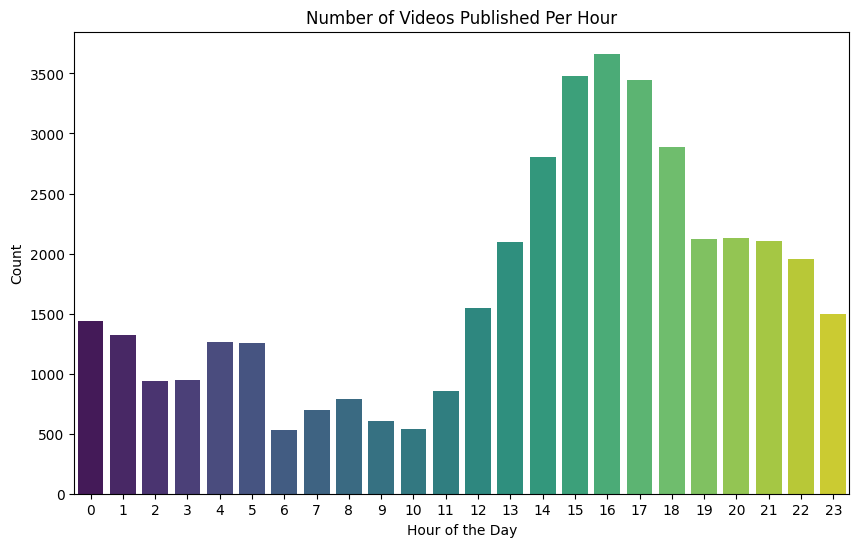

In [81]:
# Bar plot for Number of Videos Published Per Hour
videos_per_hour = df['publish_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sb.barplot(x=videos_per_hour.index, y=videos_per_hour.values, palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Number of Videos Published Per Hour')
plt.show()

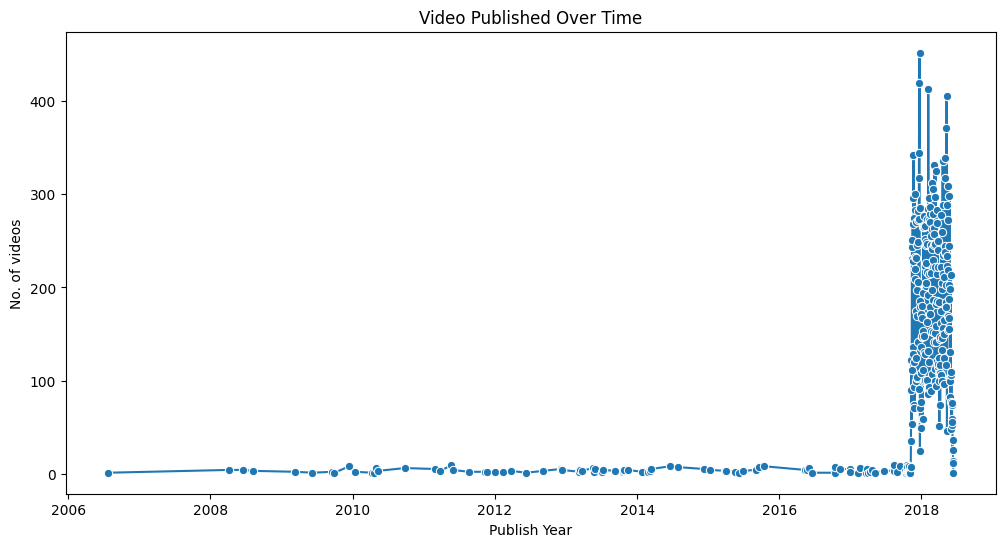

In [82]:
# Line plot for Videos Published Over Time
df['publish_date'] = df['publish_time'].dt.date
df['publish_time'] = df['publish_time'].dt.time
video_count_by_date = df.groupby('publish_date')['video_id'].count()
plt.figure(figsize=(12, 6))
sb.lineplot(x=video_count_by_date.index, y=video_count_by_date.values, marker='o')
plt.xlabel('Publish Year')
plt.ylabel('No. of videos')
plt.title('Video Published Over Time')
plt.show()

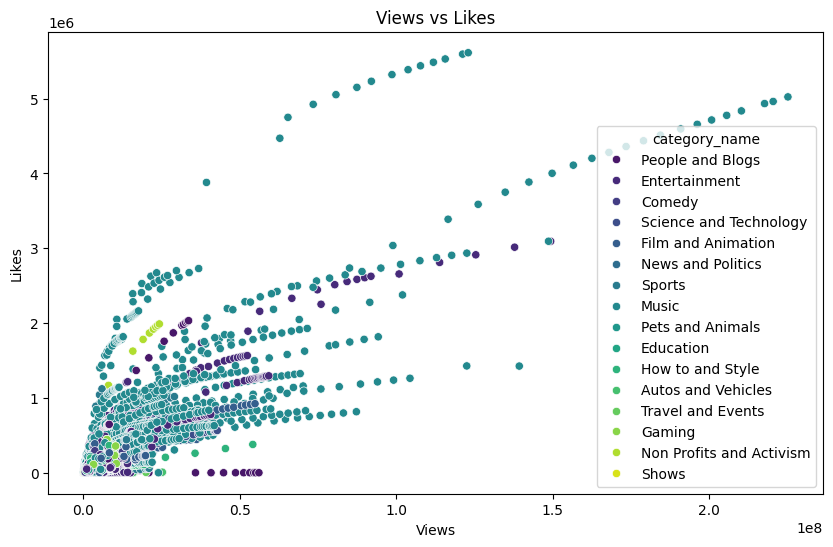

In [83]:
# Scatter plot between views and likes
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, x='views', y='likes', hue='category_name', palette='viridis')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Views vs Likes')
plt.show()

<Figure size 640x480 with 0 Axes>

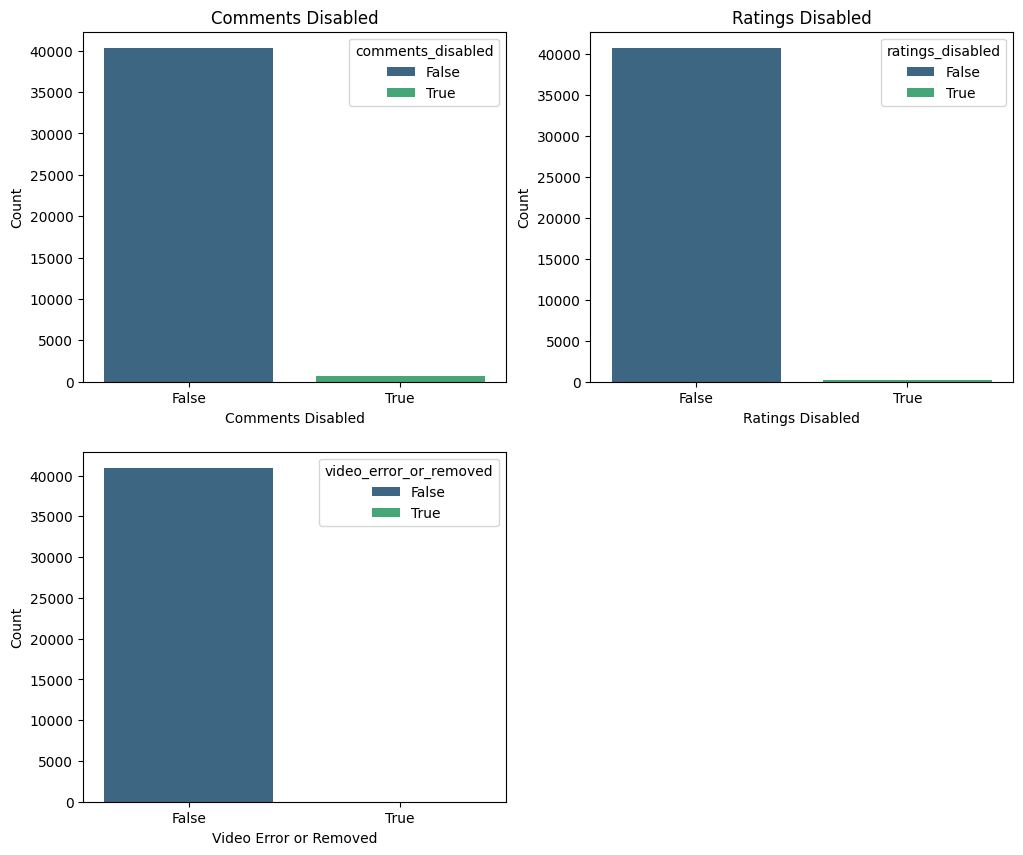

In [87]:
# Count plot for comments_disabled, ratings_disabled and video_error_or_removed
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
ch1 = sb.countplot(data=df, x='comments_disabled', palette='viridis', hue = 'comments_disabled')
plt.xlabel('Comments Disabled')
plt.ylabel('Count')
plt.title('Comments Disabled')
plt.subplot(2, 2, 2)
ch2 = sb.countplot(data=df, x='ratings_disabled', palette='viridis', hue = 'ratings_disabled')
plt.xlabel('Ratings Disabled')
plt.ylabel('Count')
plt.title('Ratings Disabled')
plt.subplot(2, 2, 3)
ch3 = sb.countplot(data=df, x='video_error_or_removed', palette='viridis', hue = 'video_error_or_removed')
plt.xlabel('Video Error or Removed')
plt.ylabel('Count')
plt.show()

In [85]:
# Correlation of views and likes
correlation = df['views'].corr(df['likes'])
print("Correlation between views and likes:", correlation)

Correlation between views and likes: 0.8491785476230508
